<a href="https://colab.research.google.com/github/shrutisj12/AgriSense-AI-Intelligent-Crop-Disease-Assistant/blob/main/Day1_Crop_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

üåæ DAY 1: Setup + Crop Recommendation Data Understanding (Colab + GitHub)     
üéØ Goal:

üëâ Prepare environment (in Google Colab)    
üëâ Load and understand crop recommendation dataset                
üëâ Push MY first notebook to GitHub

# Install Required Libraries

In [ ]:
'''Requirements : !pip install pandas numpy scikit-learn streamlit matplotlib seaborn joblib

# # this are already installed pandas numpy matplotlib seaborn scikit-learn

# i have to install only streamlit joblib '''

!pip install streamlit joblib


#Get the Dataset
dataset from:
Kaggle Crop Recommendation Dataset    
üëâ https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

# Dataset Uploaded successfully

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Crop_recommendation.csv to Crop_recommendation.csv


#Load and View Data

In [ ]:
import pandas as pd
df = pd.read_csv('Crop_recommendation.csv')
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

#Explore the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

#‚úÖ Checked:

Data types (numeric/categorical)

Missing values

Overall statistics

#Basic Visualization

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Histograms for numerical features
# df.hist(figsize=(12, 10))
# plt.tight_layout()
# plt.show()

# # Count plot for the label
# plt.figure(figsize=(10, 6))
# sns.countplot(data=df, y='label')
# plt.title('Count of Each Crop Type')
# plt.xlabel('Count')
# plt.ylabel('Crop Type')
# plt.show()

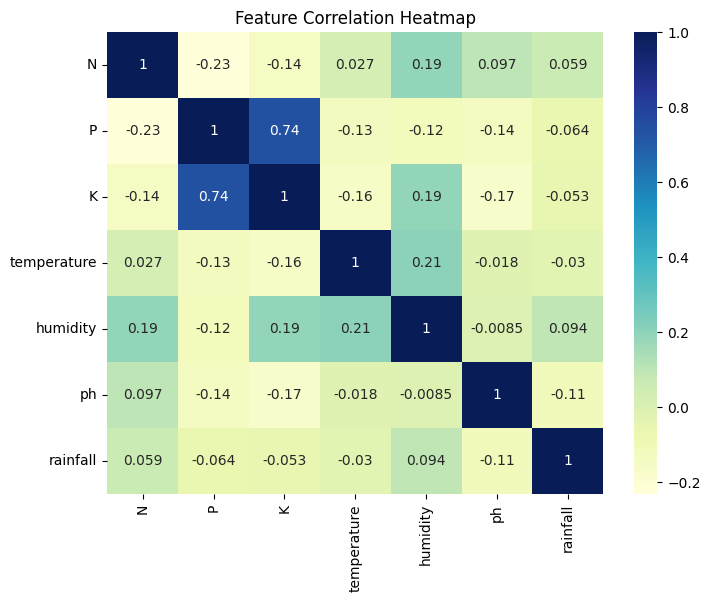

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()


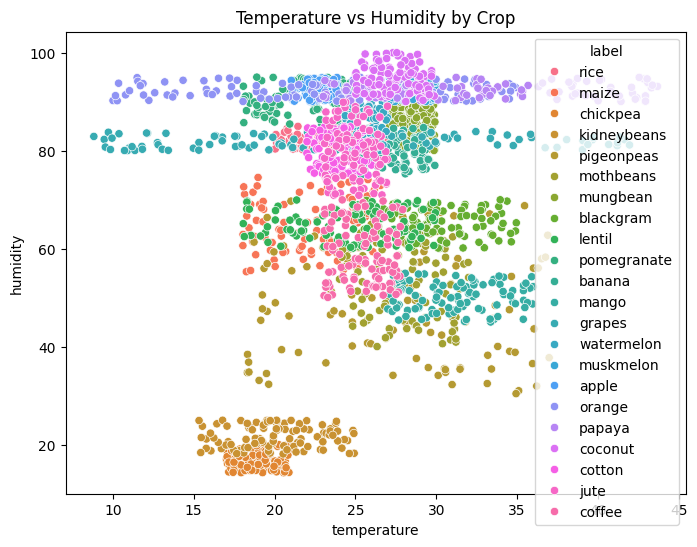

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='temperature',y='humidity',hue='label', data=df)
plt.title("Temperature vs Humidity by Crop")
plt.show()

#**Define ML Objective**

#üéØ Machine Learning Objective ‚Äì Crop Recommendation System
1Ô∏è‚É£ Problem Definition

Farmers often face difficulty in deciding which crop to grow for a particular season and soil condition.                 
The goal of this project is to develop a machine learning model that can predict the most suitable crop based on given soil and climate parameters.


2Ô∏è‚É£ Input Features (Independent Variables)

The dataset includes the following numerical features:

Feature	Description    
N	Nitrogen content ratio in soil         
P	Phosphorus content ratio in soil
K	Potassium content ratio in soil                  
temperature	Average temperature (¬∞C)
humidity	Relative humidity (%)                        
ph	pH value of the soil                       
rainfall	Annual rainfall (mm)     

3Ô∏è‚É£ Output Label (Target Variable)
Column	Description
label	The name of the crop best suited for the given conditions (e.g., rice, wheat, maize, etc.)

4Ô∏è‚É£ Type of Machine Learning Problem

This is a multi-class classification problem, since the output variable (label) can take one of many crop names.                  
The model will learn patterns from historical data and classify new soil‚Äìclimate combinations into the most likely crop category.

5Ô∏è‚É£ Evaluation Approach

We will:

Split the data into training and testing sets.

Train models such as Decision Tree, Random Forest, or Logistic Regression.

Evaluate using accuracy, confusion matrix, and classification report.

Save the final trained model using joblib for later deployment.

6Ô∏è‚É£ Expected Outcome

The model should:

Take new soil and climate inputs from the user.

Predict the most suitable crop for those conditions.

Help farmers make data-driven crop decisions.

‚úÖ This Deliverable:
After writing this cell, notebook will clearly show:

The full ML objective,

What input/output the model will use,

Why it‚Äôs a classification task,

What results we expect.